
### **Importing the Dependencies & Loading the Data**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [192]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### **Pre-processing Data**

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [194]:
df['basement'] = df['basement'].replace({'no','yes'},{0,1})
df['guestroom'] = df['guestroom'].replace({'no','yes'},{0,1})
df['mainroad'] = df['mainroad'].replace({'no','yes'},{0,1})
df.hotwaterheating = df.hotwaterheating.replace({'no','yes'},{0,1})
df.airconditioning = df.airconditioning.replace({'no','yes'},{0,1})
df.prefarea = df.prefarea.replace({'no','yes'},{0,1})
df['furnishingstatus'] = df['furnishingstatus'].replace({
    'semi-furnished': 1,
    'furnished': 2,
    'unfurnished': 0
})
df.head()

<ipython-input-194-85c84d9f847f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement'] = df['basement'].replace({'no','yes'},{0,1})
<ipython-input-194-85c84d9f847f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace({'no','yes'},{0,1})
<ipython-input-194-85c84d9f847f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavi

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [196]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.141284,0.822018,0.649541,0.954128,0.684404,0.693578,0.765138,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [197]:
df.isnull().count()

,0
price,545
area,545
bedrooms,545
bathrooms,545
stories,545
mainroad,545
guestroom,545
basement,545
hotwaterheating,545
airconditioning,545


In [198]:
df.duplicated().sum()

np.int64(0)

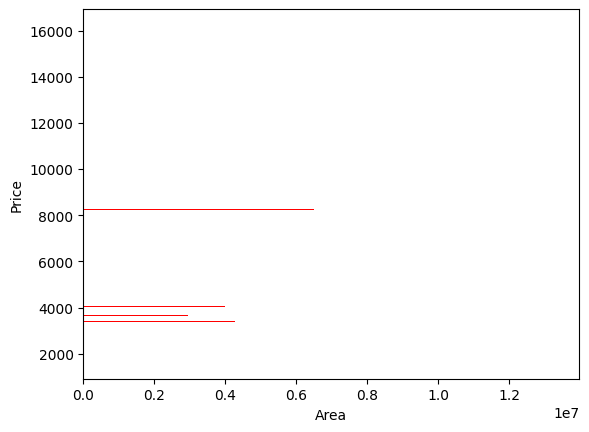

In [199]:
plt.barh(df.area, df.price, label='Price vs Area', color='red')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

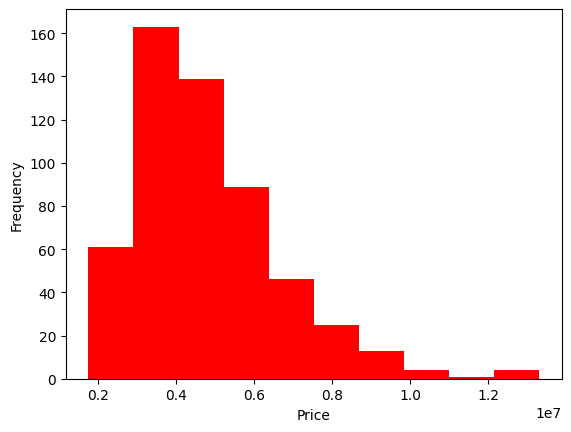

In [200]:
plt.hist(df.price, color='red')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **Separating Inputs(x) and Output(y)**

In [201]:
x = df.drop(['price'], axis=1)
y = df['price']

In [202]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2


In [203]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


### **Separating testing and training data**

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [205]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

### **Selecting Model**

In [206]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [207]:
lr_y_train_pred = lr.predict(x_train)
lr_y_test_pred = lr.predict(x_test)

In [208]:
lr_y_train_pred

array([3969898.15557661, 4450514.33515722, 3349628.35211275,
       3430727.74481765, 3184771.50758565, 5556384.53549989,
       2933023.79273258, 4993864.09644715, 7012108.79216207,
       4360518.03405271, 3463822.37518276, 2614263.91816457,
       5883127.89368234, 5247233.48245341, 6347578.67734223,
       5167966.2168391 , 5658421.65396537, 3940892.2072059 ,
       7758845.19570596, 4206196.76630239, 5305957.17981352,
       2597014.53295445, 5559842.80985256, 4227998.42232193,
       4424033.88377291, 4840826.7086346 , 8028996.44308214,
       6083388.02124537, 3815909.12240489, 3300892.35471485,
       4434276.56324435, 3982950.1193591 , 3602316.45772235,
       3622280.15186118, 4477706.45237648, 3174091.93639417,
       4082127.3132139 , 4600907.19530018, 2641227.11676809,
       8318656.4295868 , 5089506.38825962, 7565580.62575988,
       8260343.96510721, 7650484.65974482, 5660847.96552746,
       3499988.71193622, 3653093.11636461, 3093921.53913565,
       3849637.93461274,

### **Evaluating Model**

In [209]:
#Evaluating Training Data
lr_mse_train = mean_squared_error(y_train, lr_y_train_pred)
lr_r2_train = r2_score(y_train, lr_y_train_pred)
print('Mean Squared Error:', lr_mse_train)
print('R2 Score:', lr_r2_train)

Mean Squared Error: 1082000244095.612
R2 Score: 0.6884454072877346


In [210]:
#Evaluating Testing Data

lr_mse_test = mean_squared_error(y_test, lr_y_test_pred)
lr_r2_test = r2_score(y_test, lr_y_test_pred)
print('Mean Squared Error:', lr_mse_test)
print('R2 Score:', lr_r2_test)

Mean Squared Error: 1291157100569.1445
R2 Score: 0.6361990100766217


In [211]:
lr_frame = pd.DataFrame({
    'Mean Squared Error': [lr_mse_train, lr_mse_test],
    'R2 Score': [lr_r2_train, lr_r2_test]
}, index=['Train', 'Test'])

print(lr_frame)


       Mean Squared Error  R2 Score
Train        1.082000e+12  0.688445
Test         1.291157e+12  0.636199


In [212]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [213]:
#Evaluating train data
rf_y_train_pred = rf.predict(x_train)
rf_mse_train = mean_squared_error(y_train, rf_y_train_pred)
rf_r2_train = r2_score(y_train, rf_y_train_pred)
print( 'RF - Mean Squared Error:', mse_train)
print('RF - R2 Score:', r2_train)

RF - Mean Squared Error: 197826848782.15253
RF - R2 Score: 0.9435389717073774


In [214]:
#Evaluating train data
rf_y_test_pred = rf.predict(x_test)
rf_mse_test = mean_squared_error(y_test, rf_y_test_pred)
rf_r2_test = r2_score(y_train, rf_y_train_pred)
print( 'RF - Mean Squared Error:', mse_test)
print('RF - R2 Score:', r2_test)

RF - Mean Squared Error: 1257758208930.0833
RF - R2 Score: 0.9435389717073774


In [215]:
rf_frame = pd.DataFrame({
    'Mean Squared Error': [rf_mse_train, rf_mse_test],
    'R2 Score': [rf_r2_train, rf_r2_test]
}, index=['Train', 'Test'])

print(rf_frame)

       Mean Squared Error  R2 Score
Train        1.885321e+11  0.945713
Test         1.676272e+12  0.945713


In [216]:
evaluation_table = pd.concat({
    'Linear Regression': lr_frame,
    'Random Forest Regression': rf_frame
}, axis=1)

evaluation_table


Linear Regression           Random Forest Regression          
      Mean Squared Error  R2 Score       Mean Squared Error  R2 Score
Train       1.082000e+12  0.688445             1.885321e+11  0.945713
Test        1.291157e+12  0.636199             1.676272e+12  0.945713

### **Predicting Output**

In [217]:
input_data = (6000, 3, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2)
input_data_array = np.array(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print(prediction)

[6265501.82576235]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
